<a href="https://colab.research.google.com/github/akanksha0911/Colab_assignment1/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages and Load Dataset**

In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
#download kaggle.json from kaggle.com - account- create API token
#upload kaggle.json file here
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akanksharawat09","key":"9c3e77da413d009d43fd7cdf415940da"}'}

In [3]:
#create a kaggle folder
!mkdir -p ~/.kaggle

In [4]:
#copy the kaggle.json file to create folder
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# copy kaggle API to import data from kaggle
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 86.6MB/s]


In [6]:
#unzip the data file 
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib 
import matplotlib.pyplot as plt

# A jupyter notebook specific command that let’s you see the plots in the notbook itself.
%matplotlib inline

In [8]:
df1 = pd.read_csv("/content/hotel_bookings.csv")
df1.shape

(119390, 32)

In [9]:
sum(df1.duplicated())

31994

In [10]:
df = df1.copy()

In [11]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


 Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
#checking null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
counts = df['country'].value_counts()
counts


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BHS        1
BWA        1
AIA        1
GUY        1
PLW        1
Name: country, Length: 177, dtype: int64

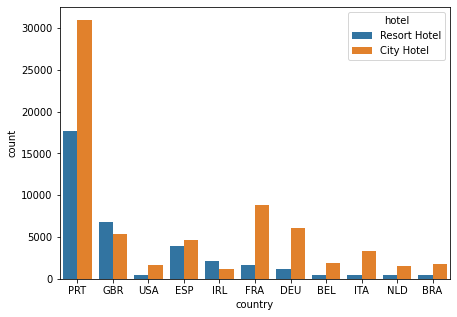

In [16]:
plt.subplots(figsize=(7,5))
sns.countplot(x='country', hue='hotel',  data=df[df['country'].isin(counts[counts > 2000].index)])
plt.show()

In [17]:
#filling null values and droping few 'not very useful' coloums 
df['agent'] = df['agent'].fillna(0)
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('PRT')


drop_col = ['days_in_waiting_list', 'arrival_date_year', 'assigned_room_type', 'arrival_date_week_number', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list', 'customer_type', 'company', ]

df.drop(drop_col, axis = 1, inplace = True)

In [18]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,0.0,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.0,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,98.0,0,1,2015-07-03
5,Resort Hotel,0,14,July,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,98.0,0,1,2015-07-03
6,Resort Hotel,0,0,July,1,0,2,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,107.0,0,0,2015-07-03
7,Resort Hotel,0,9,July,1,0,2,2,0.0,0,FB,Direct,Direct,0,0,0,C,No Deposit,303.0,103.0,0,1,2015-07-03
8,Resort Hotel,1,85,July,1,0,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,82.0,0,1,2015-05-06
9,Resort Hotel,1,75,July,1,0,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,No Deposit,15.0,105.5,0,0,2015-04-22


In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
deposit_type                      0
agent                             0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date           0
dtype: int64

In [20]:
df.shape

(119390, 23)

In [21]:
#find the categorical features
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
reservation_status_date 926


In [22]:
#According to the above result, It's obvious that I can't use one hot encoding for most of our categorical features! 
#because that would create a lot of columns and adds a lot of complexity to our model. 
#Therefore I am going to use label encoding by Lable Encoder in sklearn 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])



In [23]:
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day



In [24]:
df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [25]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,Resort Hotel,0,342,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,0.0,0,0,2015,7,1
1,Resort Hotel,0,737,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,0.0,0,0,2015,7,1
2,Resort Hotel,0,7,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,No Deposit,0.0,75.0,0,0,2015,7,2
3,Resort Hotel,0,13,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,No Deposit,304.0,75.0,0,0,2015,7,2
4,Resort Hotel,0,14,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,98.0,0,1,2015,7,3
5,Resort Hotel,0,14,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,98.0,0,1,2015,7,3
6,Resort Hotel,0,0,1,0,2,2,0.0,0,BB,Direct,Direct,0,0,0,C,No Deposit,0.0,107.0,0,0,2015,7,3
7,Resort Hotel,0,9,1,0,2,2,0.0,0,FB,Direct,Direct,0,0,0,C,No Deposit,303.0,103.0,0,1,2015,7,3
8,Resort Hotel,1,85,1,0,3,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,No Deposit,240.0,82.0,0,1,2015,5,6
9,Resort Hotel,1,75,1,0,3,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,D,No Deposit,15.0,105.5,0,0,2015,4,22


In [26]:
a = df.select_dtypes(object).columns
list_catv = []
for i in a:
    print (i, df[i].nunique())
    list_catv.append(i)

hotel 2
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3


In [27]:
for i in list_catv:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

In [28]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
0,1,0,342,1,0,0,2,0.0,0,0,3,1,0,0,0,2,0,0.0,0.0,0,0,1,6,0
1,1,0,737,1,0,0,2,0.0,0,0,3,1,0,0,0,2,0,0.0,0.0,0,0,1,6,0
2,1,0,7,1,0,1,1,0.0,0,0,3,1,0,0,0,0,0,0.0,75.0,0,0,1,6,1
3,1,0,13,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,304.0,75.0,0,0,1,6,1
4,1,0,14,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,240.0,98.0,0,1,1,6,2
5,1,0,14,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,240.0,98.0,0,1,1,6,2
6,1,0,0,1,0,2,2,0.0,0,0,3,1,0,0,0,2,0,0.0,107.0,0,0,1,6,2
7,1,0,9,1,0,2,2,0.0,0,1,3,1,0,0,0,2,0,303.0,103.0,0,1,1,6,2
8,1,1,85,1,0,3,2,0.0,0,0,6,3,0,0,0,0,0,240.0,82.0,0,1,1,4,5
9,1,1,75,1,0,3,2,0.0,0,2,5,3,0,0,0,3,0,15.0,105.5,0,0,1,3,21


In [29]:
#check duplicate
sum(df.duplicated())

35922

In [30]:
#remove duplicate
df.drop_duplicates(inplace=True)


In [31]:
df.shape

(83468, 24)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



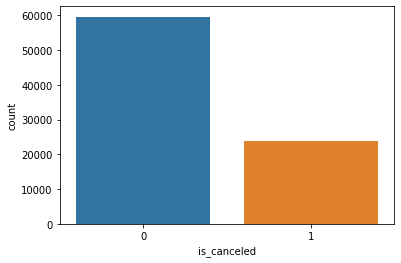

In [32]:
sns.countplot(df["is_canceled"])




    Canceling rate is pretty much high.
    70000> not canceled Vs. 40000> canceled.

**Train|Test Split**

In [33]:
from sklearn.model_selection import train_test_split
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.3)
X_train


,hotel,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
7860,1,39,30,0,5,2,0.0,0,2,3,1,0,0,0,0,0,0.0,159.00,0,5,2,6,21
14621,1,155,11,2,2,2,0.0,0,2,3,1,0,0,0,3,0,250.0,225.50,0,1,3,7,14
61160,0,47,2,2,6,2,0.0,0,0,6,3,0,0,0,0,0,9.0,88.40,0,1,2,9,26
83438,0,4,30,2,1,2,0.0,0,0,5,3,0,0,0,0,0,28.0,66.00,0,0,2,1,1
14223,1,1,2,0,1,2,0.0,0,0,3,1,0,0,1,3,0,0.0,8.00,0,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72349,0,134,26,1,4,2,1.0,0,0,6,3,0,0,0,0,0,9.0,148.50,0,1,3,2,16
7766,1,44,25,2,5,2,0.0,0,0,6,3,0,0,0,0,0,240.0,193.29,0,3,2,7,10
106929,0,84,3,0,2,2,0.0,0,3,6,3,0,0,0,0,0,9.0,79.20,0,2,3,2,4
119129,0,278,25,2,3,2,0.0,0,3,6,3,0,0,0,0,0,9.0,89.10,0,1,3,7,29


**Feature Scaling**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train the model**

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

**Evaluate the model**

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
acc_dtc

0.8427778443352901